This to plot some infos or polish figures for the Mid-report.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-talk'])
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # to plot Chinese words properly

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# 資料收集

In [3]:
# all the merged water level data from WRA, without cleaning
zaf_df = pd.read_csv('data/database_ZAF_wl_20211007.csv', dtype=object)
zaf_df.describe()

,井名,井號,水位(m),日期時間
count,38697849,38697849,38696441,38697849
unique,604,226,170728,250187
top,漢寶(3),7100211,-999998.0,2020-03-03 10:10
freq,173739,306676,955368,196


In [4]:
print(zaf_df['日期時間'].max())
print(zaf_df['日期時間'].min())

2021-09-21 23:50
2007-01-01


# 水井不良率

In [6]:
rate_df = pd.read_csv('results/wl_wra_well_condition_20211008.csv')

Text(0.5, 0, '水利署歷年各水井水位不良率')

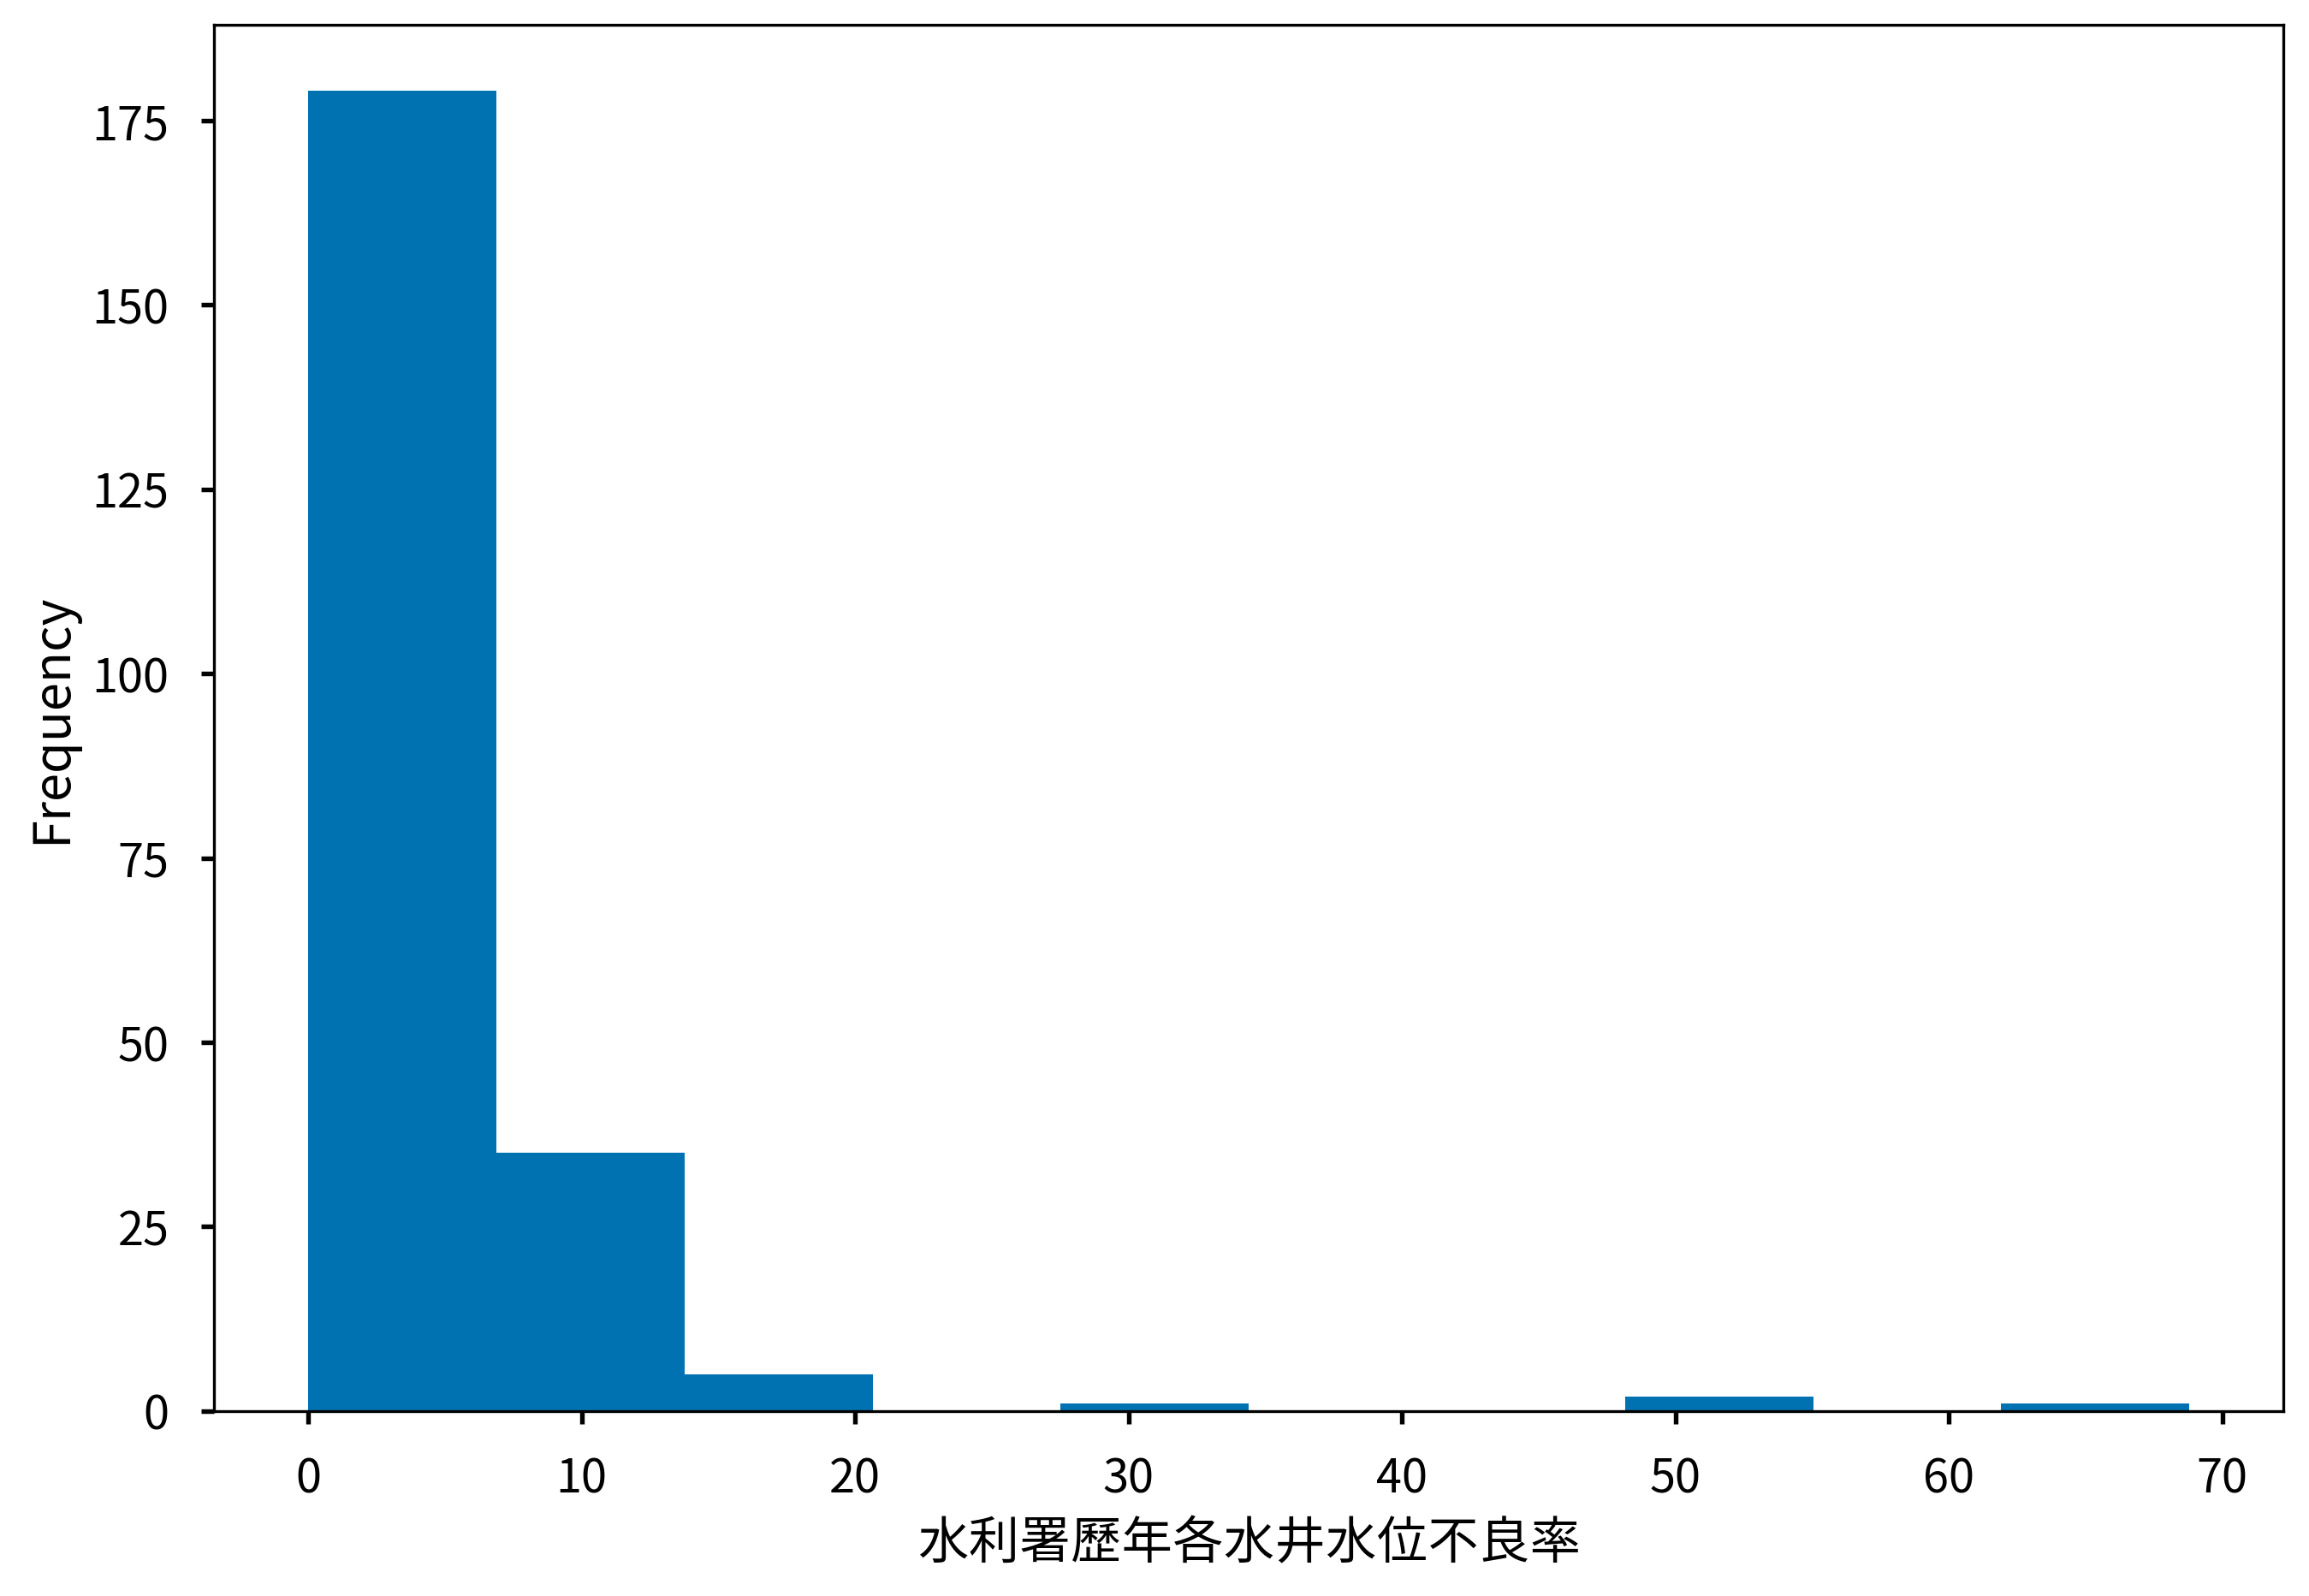

In [9]:
rate_df['不良率'].plot(kind='hist')
plt.xlabel('水利署歷年各水井水位不良率')

# WRA 水質 column 名稱對照

In [9]:
import pandas as pd
import geopandas as gd

raw_df = pd.read_excel(
    'data/wra_1992-2019_compile_20210421.xlsx',
    index_col=0
    )
csv_df = pd.read_csv('data/database_ZAF_wa_clean_gps_20211008.csv')
shp_df = gd.read_file('data/ZAF_wa_wra_20211008.shp', encoding='big5')

In [10]:
cols_df = pd.concat([
    pd.Series(raw_df.columns, name='raw column names'),
    pd.Series(csv_df.columns, name='csv column names'),
    pd.Series(shp_df.columns, name='shp column names')],
    axis=1, join='outer'
    )
cols_df

,raw column names,csv column names,shp column names
0,井號,井號,SiteId
1,井名,井名,SiteName
2,井別,井別,SiteType
3,取樣日期,取樣日期,SampleDate
4,檢驗日期,檢驗日期,ExamDate
5,Hard(mg/L),Hard(mg/L),Hard(mg/L)
6,CL(mg/L),CL(mg/L),CL(mg/L)
7,HCO3(mg/L),HCO3(mg/L),HCO3(mg/L)
8,SO4(mg/L),SO4(mg/L),SO4(mg/L)
9,NO3_N(mg/L),NO3_N(mg/L),NO3_N(ppm)


In [12]:
cols_df.to_csv('data/database_ZAF_wra_wa_colnames_{}.csv'.format(date), index=False)

# EPA column 名稱對照

In [10]:
raw_cols = ['測站名稱', 'Sampling date', 'Sampling time', 'ID', '水面至井口深度', 'T', 'EC',
       'pH', 'DO (Electrode Method)', 'dissolved oxygen saturation',
       'total hardness', 'TDS', 'Cl', 'NH3', 'NO2', 'SO4', 'TOC', 'As', 'Cd',
       'Cr', 'Cu', 'Pb', 'Zn', 'Fe', 'Mn', 'Hg', 'Ni', 'total phenol', 'F',
       'Na', 'K', 'Ca', 'Mg', 'Alkalinity', 'benzene', 'toluene',
       'ethylbenzene', 'xylene', 'naphthalene', 'CCl4', 'chlorobenzene',
       'chloroform', 'methyl chloride', 'p-dicholorobenzene',
       '1,1-Dichloroethane', '1,2-dichloroethane', '1,1-Dichloroethylene',
       '1,2-DCE', '1,2-DCE (RE)', '\tTCE', '\tPCE', 'Chloroethene',
       'Dichloromethane', '\t1,1,2-TCE', '1,1,1-trichloroethane',
       '1,2-Dichlorobenzene', '\tMTBE', 'remark']
new_cols = ['SiteName', 'Date', 'Time', 'SiteId', 'WaterDe_m', 'Temp', 'EC',
       'pH', 'DO', 'DOS',
       'Hardness', 'TDS', 'Cl', 'NH3', 'NO2', 'SO4', 'TOC', 'As', 'Cd',
       'Cr', 'Cu', 'Pb', 'Zn', 'Fe', 'Mn', 'Hg', 'Ni', 'Phenol', 'F',
       'Na', 'K', 'Ca', 'Mg', 'Alkalinity', 'Benzene', 'Toluene',
       'ethyl-b', 'Xylene', 'Naphthalen', 'CCl4', 'Cl-b',
       'Chloroform', 'Methyl-Cl', 'p-d.c.b',
       '11-d.c.t', '12-d.c.t', '11-d.c.y',
       '12-DCE', '12-DCE(RE)', 'TCE', 'PCE', 'Cl-ethene',
       'DCE', '112-TCE', '111-TCE',
       '12-DCB', 'MTBE', 'remark']
# Date and Time are merger to Datetime
# remark is delected

In [13]:
epa_df = pd.read_excel(
    'data/環保署濁水溪屏東_地下水水質1993-2020.xlsx',
    sheet_name='1993_2020(濁水溪)'
    )
epa_df.head()

,測站名稱,Sampling date,Sampling time,ID,水面至井口深度,T,EC,pH,DO (Electrode Method),dissolved oxygen saturation,...,"1,2-DCE (RE)",\tTCE,\tPCE,Chloroethene,Dichloromethane,"\t1,1,2-TCE","1,1,1-trichloroethane","1,2-Dichlorobenzene",\tMTBE,remark
0,NaN,NaN,NaN,NaN,m,℃,μmho/cm25℃,NaN,mg/L,%,...,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L,mg/L,NaN
1,二林營運所,1993/04/16,00:00:00,4035.0,--,21,490,7.3,--,--,...,--,--,--,--,--,--,--,--,--,無
2,二林營運所,1993/08/18,00:00:00,4035.0,--,28,434,7.7,--,--,...,--,--,--,--,--,--,--,--,--,無
3,二林營運所,1993/12/29,00:00:00,4035.0,--,24,503,7.5,--,--,...,--,--,--,--,--,--,--,--,--,無
4,二林營運所,1994/04/25,00:00:00,4035.0,--,26,435,7,--,--,...,--,--,--,--,--,--,--,--,--,無


In [14]:
csv_df = pd.read_csv('data/database_ZAF_wl+wa_epa_clean_gps_20211008.csv')
shp_df = gd.read_file('data/ZAF_wl+wa_epa_20211008.shp', encoding='big5')

In [24]:
names_df

,raw column names,units
測站名稱,測站名稱,NaN
Sampling date,Sampling date,NaN
Sampling time,Sampling time,NaN
ID,ID,NaN
水面至井口深度,水面至井口深度,m
T,T,℃
EC,EC,μmho/cm25℃
pH,pH,NaN
DO (Electrode Method),DO (Electrode Method),mg/L
dissolved oxygen saturation,dissolved oxygen saturation,%


In [33]:
import numpy as np
np.insert(csv_df.columns, 2, '')

Index(['SiteName', 'Datetime', '', 'SiteId', 'WaterDe_m', 'Temp', 'EC', 'pH',
       'DO', 'DOS', 'Hardness', 'TDS', 'Cl', 'NH3', 'NO2', 'SO4', 'TOC', 'As',
       'Cd', 'Cr', 'Cu', 'Pb', 'Zn', 'Fe', 'Mn', 'Hg', 'Ni', 'Phenol', 'F',
       'Na', 'K', 'Ca', 'Mg', 'Alkalinity', 'Benzene', 'Toluene', 'ethyl-b',
       'Xylene', 'Naphthalen', 'CCl4', 'Cl-b', 'Chloroform', 'Methyl-Cl',
       'p-d.c.b', '11-d.c.t', '12-d.c.t', '11-d.c.y', '12-DCE', '12-DCE(RE)',
       'TCE', 'PCE', 'Cl-ethene', 'DCE', '112-TCE', '111-TCE', '12-DCB',
       'MTBE', 'Lon', 'Lat'],
      dtype='object')

In [34]:
names_df = pd.DataFrame({
    # delete remark
    'raw column names': epa_df.columns[:-1].values,
    'units': epa_df.iloc[0, :-1].values
    })
names_df = pd.concat([
    names_df,
    pd.Series(np.insert(csv_df.columns, 2, ''), name='csv column names'),
    pd.Series(np.insert(shp_df.columns, 2, ''), name='shp column names')],
    axis=1, join='outer'
    )
names_df

,raw column names,units,csv column names,shp column names
0,測站名稱,NaN,SiteName,Datetime
1,Sampling date,NaN,Datetime,SiteName
2,Sampling time,NaN,,
3,ID,NaN,SiteId,SiteId
4,水面至井口深度,m,WaterDe_m,WaterDe_m
5,T,℃,Temp,Temp
6,EC,μmho/cm25℃,EC,EC
7,pH,NaN,pH,pH
8,DO (Electrode Method),mg/L,DO,DO
9,dissolved oxygen saturation,%,DOS,DOS


In [35]:
names_df.to_csv('data/database_ZAF_epa_colnames_{}.csv'.format(date), index=False)

# Play Geopandas on EPA data

In [37]:
compile_df = pd.read_csv('data/database_ZAF_wl+wa_epa_clean_gps_20211008.csv')

In [38]:
import geopandas as gd
gdf = gd.GeoDataFrame(
    compile_df, 
    geometry=gd.points_from_xy(compile_df.Lon, compile_df.Lat), 
    crs='EPSG:4326'
    )

In [39]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
gdf.head()

,SiteName,Datetime,SiteId,WaterDe_m,Temp,EC,pH,DO,DOS,Hardness,...,PCE,Cl-ethene,DCE,112-TCE,111-TCE,12-DCB,MTBE,Lon,Lat,geometry
0,二崙國小,2000-03-22 00:00:00,4413,NaN,23.5,1130.0,7.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842,POINT (120.41510 23.77184)
1,二崙國小,2000-06-21 00:00:00,4413,NaN,27.0,1060.0,7.3,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842,POINT (120.41510 23.77184)
2,二崙國小,2000-08-17 00:00:00,4413,NaN,25.0,1080.0,7.0,NaN,NaN,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842,POINT (120.41510 23.77184)
3,二崙國小,2000-12-20 00:00:00,4413,NaN,25.8,1040.0,7.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842,POINT (120.41510 23.77184)
4,二崙國小,2002-03-14 11:51:00,4413,NaN,27.6,1060.0,7.0,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.415102,23.771842,POINT (120.41510 23.77184)


In [41]:
gdf.shape

(2599, 59)

In [42]:
# to make dattimeindex handy
gdf = gdf.set_index('Datetime')
gdf = gdf.sort_index()

<AxesSubplot:>

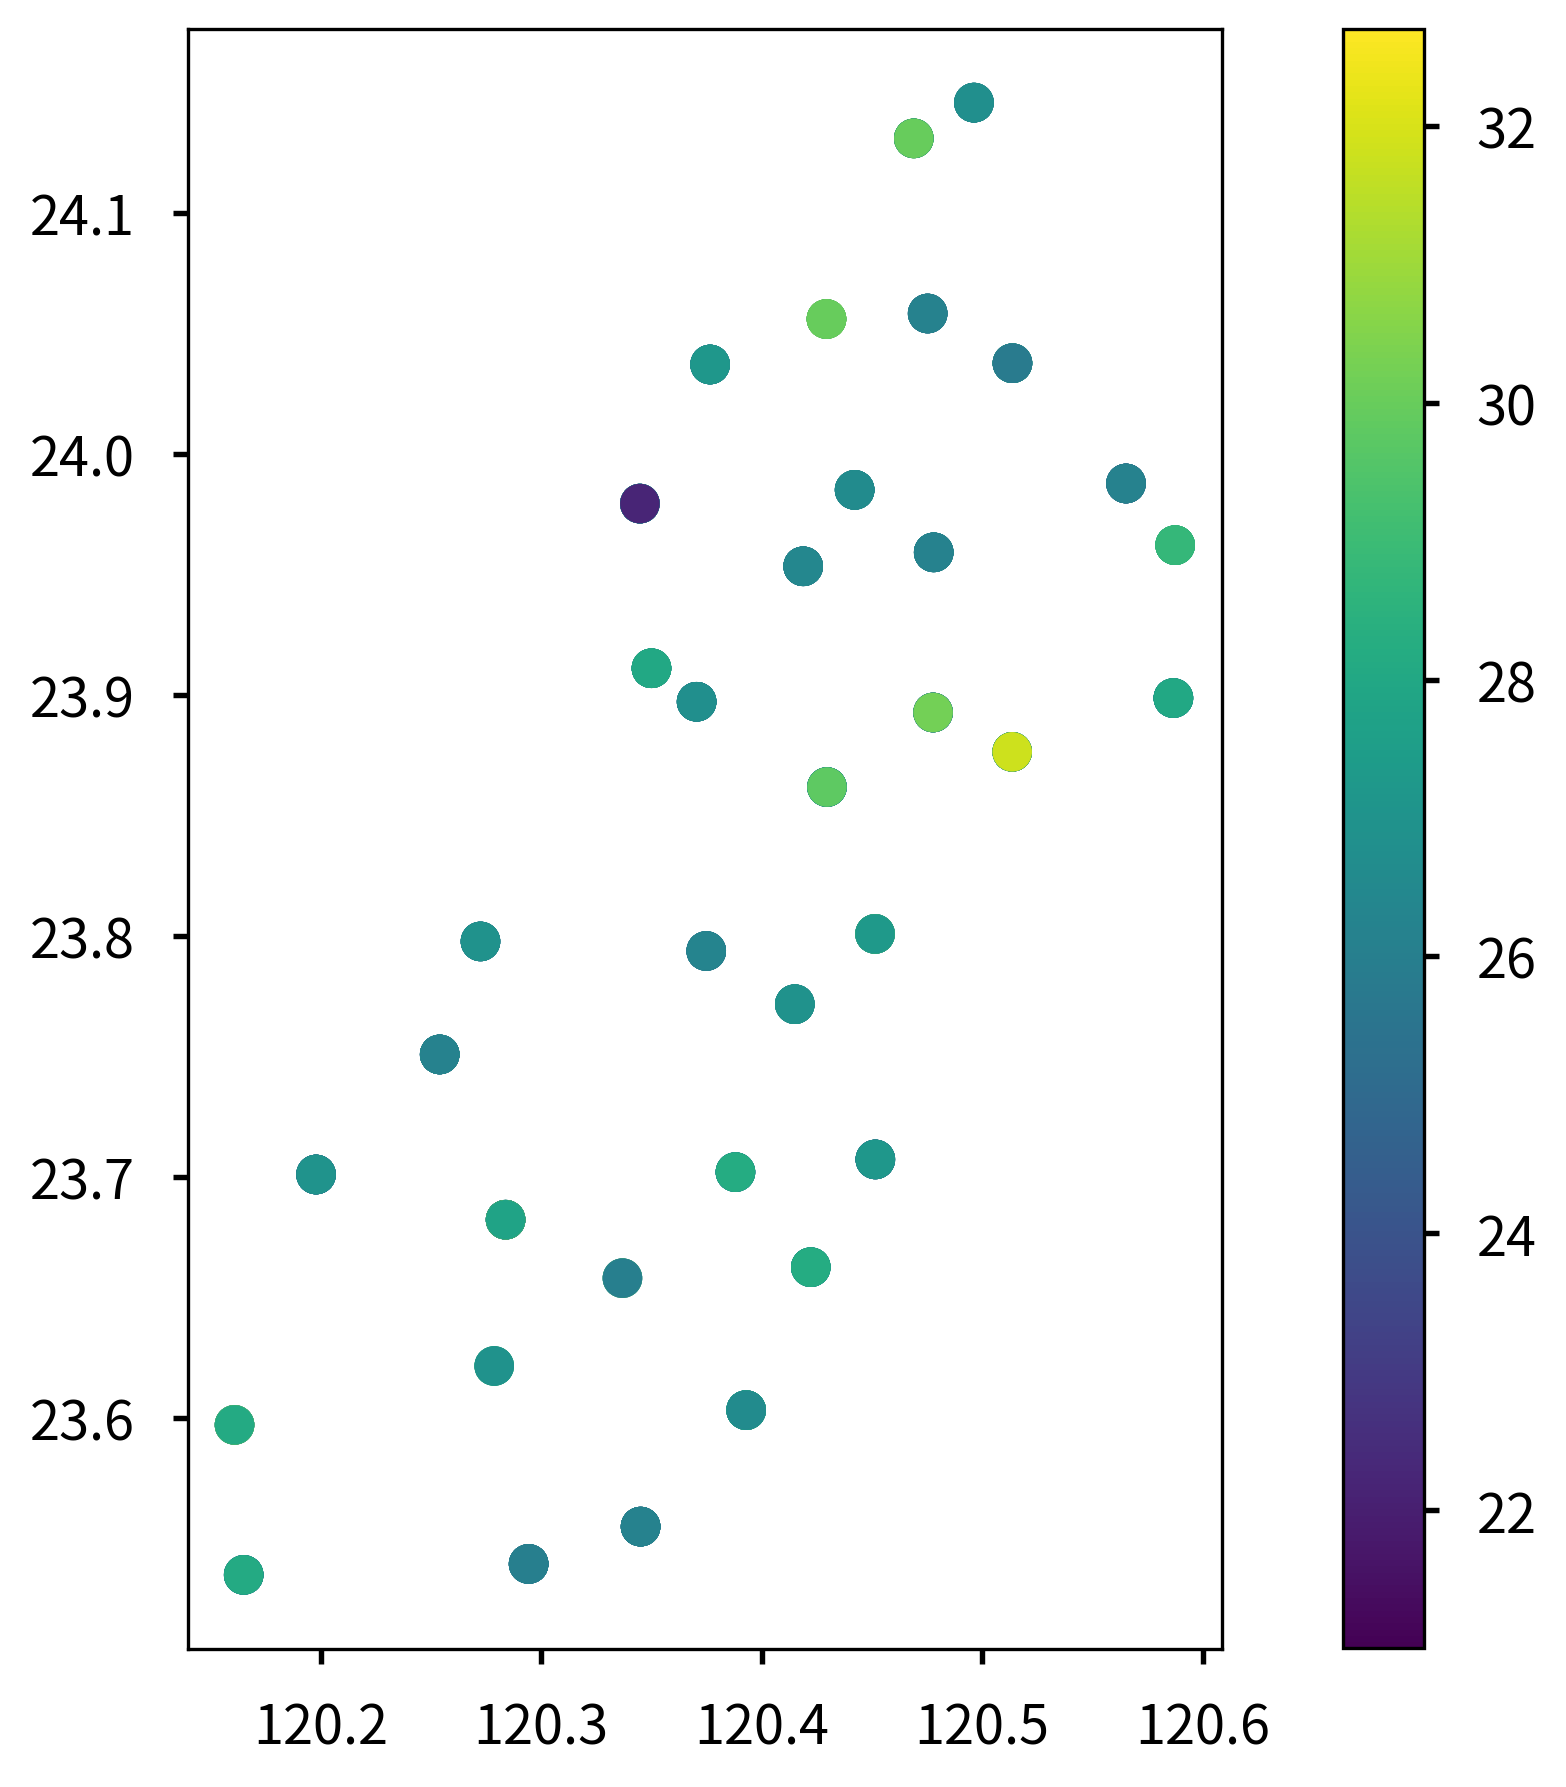

In [45]:
gdf['2000-01-01':'2002-12-31'].plot('Temp', legend=True)